http://aidiary.hatenablog.com/entry/20160328/1459174455

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, CSVLogger

import matplotlib.pyplot as plt

C:\Program Files\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
batch_size = 128
num_classes = 10
epochs = 20

# load mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784).astype('float32')
x_test = x_test.reshape(10000, 784).astype('float32')
x_train /= 255
x_test /= 255


y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


11493376/11490434 [==============================] - 7s 1us/step
(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [3]:
# build model
model = Sequential()
model.add(Dense(512, input_shape=(784, )))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
__________

In [4]:
# fit model
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', patience=2)
csv_logger = CSVLogger('training.log')
hist = model.fit(x_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1,
                 validation_split=0.1,
                 callbacks=[es, csv_logger])

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 11s 206us/step - loss: 0.2575 - acc: 0.9198 - val_loss: 0.1039 - val_acc: 0.9690
Epoch 2/20
54000/54000 [==============================] - 12s 215us/step - loss: 0.1086 - acc: 0.9673 - val_loss: 0.0774 - val_acc: 0.9767
Epoch 3/20
54000/54000 [==============================] - 12s 215us/step - loss: 0.0772 - acc: 0.9763 - val_loss: 0.0787 - val_acc: 0.9787
Epoch 4/20
54000/54000 [==============================] - 13s 239us/step - loss: 0.0615 - acc: 0.9814 - val_loss: 0.0704 - val_acc: 0.9812
Epoch 5/20
54000/54000 [==============================] - 12s 218us/step - loss: 0.0510 - acc: 0.9847 - val_loss: 0.0667 - val_acc: 0.9813
Epoch 6/20
54000/54000 [==============================] - 11s 202us/step - loss: 0.0431 - acc: 0.9865 - val_loss: 0.0737 - val_acc: 0.9820
Epoch 7/20
54000/54000 [==============================] - 11s 203us/step - loss: 0.0386 - acc: 0.9885 - val_loss: 0.0

In [5]:
# evaluate model
score = model.evaluate(x_test, y_test, verbose=0)
print('test loss:', score[0])
print('test acc:', score[1])

test loss: 0.08232588949803285
test acc: 0.981


In [6]:
# plot results
loss = hist.history['loss']
val_loss = hist.history['val_loss']

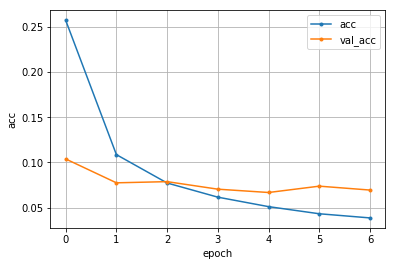

In [7]:
epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label='acc')
plt.plot(range(epochs), val_loss, marker='.', label='val_acc')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()